In [1]:
!pip install stringcase

Defaulting to user installation because normal site-packages is not writeable


In [327]:
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import stringcase
import math
import csv
import os

In [171]:
data=pd.read_csv('../scripts/steps3.csv',delimiter=',')


In [172]:
data

,step,temp,weight,best_weight,sat_clauses,sat_clauses_best
0,0,85222.00000,18363,18363,78,78
1,1,85222.00000,18364,18364,83,83
2,2,85222.00000,14401,18364,83,83
3,3,85222.00000,10599,18364,84,83
4,4,85222.00000,13754,18364,83,83
...,...,...,...,...,...,...
18272,18272,1.02244,28316,28316,91,91
18273,18273,1.02244,28316,28316,91,91
18274,18274,1.02244,28316,28316,91,91
18275,18275,1.02244,28316,28316,91,91


In [190]:

def plotWeightProgress(data, head, optimum, imgname):
    plt.figure(figsize=(7, 4))

    y= np.array(data['cost'].head(head))
    x= np.array(data['step'].head(head))
    plt.plot(x, y, label='váha stavu', color='blue')
    y2= np.array(data['best_weight'].head(head))
    plt.plot(x, y2, label='Nejlepší nalezená váha', color='red')
    plt.axhline(y=optimum, color='orange', linestyle='-', label='Optimální váha')

    plt.legend()

    plt.ylabel('weight')
    plt.xlabel('kroky')
    plt.savefig(imgname + '.png')
    plt.show()

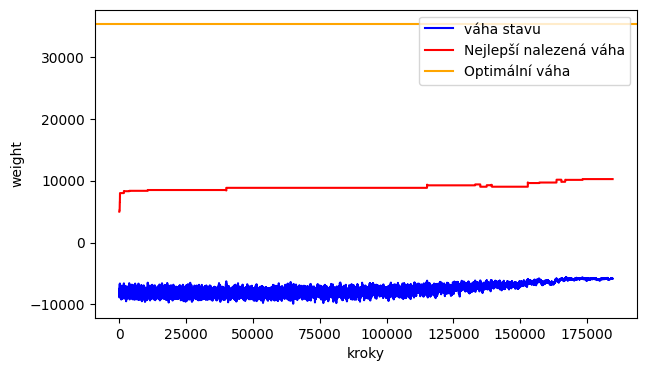

In [193]:
# data1=pd.read_csv('../scripts/steps0.csv',delimiter=',')
# plotWeightProgress(data1,50000,60323, '70_134')

# data2=pd.read_csv('../scripts/steps1.csv',delimiter=',')
# plotWeightProgress(data2,60000,71161, '70_109')

# data3=pd.read_csv('../scripts/steps2.csv',delimiter=',')
# plotWeightProgress(data3,80000,28316, '90_110')

data3=pd.read_csv('../scripts/statsR.csv',delimiter=',')
plotWeightProgress(data3,-1,35385, '90_110')

In [189]:
data3

,step,temp,weight,cost,best_weight,sat_clauses,sat_clauses_best
0,1,15000.0000,5782,1,5783,185,183
1,2,15000.0000,5781,2,5782,188,185
2,3,15000.0000,5352,3,5781,190,188
3,4,15000.0000,5353,4,5781,192,188
4,5,15000.0000,5354,5,5781,192,188
...,...,...,...,...,...,...,...
177140,177141,11.7523,10067,177141,967,206,218
177141,177142,11.7523,10067,177142,967,206,218
177142,177143,11.7523,10067,177143,967,206,218
177143,177144,11.7523,10067,177144,967,206,218


In [159]:
stats=pd.read_csv('../scripts/tmp/0.995_1_50_0/wuf20-91R-R.stat',delimiter=' ')


In [133]:
stats

,name,steps,sat,clauseSat,clauseUnsat,clausesCount,startTemp,weight,weightCorrect
0,uf20-011,95158,1,91,0,91,16834,4538,4770
1,uf20-011,75313,1,91,0,91,2216,4521,4770
2,uf20-011,75313,1,91,0,91,2216,4538,4770
3,uf20-0110,87220,1,91,0,91,7481,4770,4770
4,uf20-0110,83251,1,91,0,91,4987,4770,4770
5,uf20-0110,87220,1,91,0,91,7481,4770,4770
6,uf20-0116,114954,1,91,0,91,127834,3795,3795
7,uf20-0116,91189,0,85,6,91,11222,4951,3795
8,uf20-0116,83251,1,91,0,91,4987,3795,3795
9,uf20-0118,91189,1,91,0,91,11222,4763,4763


In [373]:
stats=pd.read_csv('../scripts/tmp/50-218R/',delimiter=' ')

stats['successWeight'] = stats['weight'] == stats['weightCorrect']

stats['awgFined'] = stats['steps'] * (1-stats['successWeight']) * 10 + stats['successWeight'] * stats['steps']



avgSuccess = len(stats.loc[stats['weight'] == stats['weightCorrect']])/ len(stats) *100

avgSteps = stats['steps'].mean()

awgFined = stats['awgFined'].mean()

endTemp = stats['endTemp'].mean()


print(avgSuccess)
print(avgSteps)
print(awgFined)
print(endTemp)



0.0
85999.875
859998.75
73.25


In [362]:
stats

,name,steps,sat,clauseSat,clauseUnsat,clausesCount,startTemp,endTemp,weight,weightCorrect,successWeight,awgFined
0,uf50-0102,109434,0,195,23,218,35056,21,10384,1967,False,1094340
1,uf50-0107,75348,0,201,17,218,16767,103,10737,882,False,753480
2,uf50-0110,84318,0,192,26,218,15820,53,10544,2975,False,843180
3,uf50-0125,107939,0,195,23,218,84556,57,11126,839,False,1079390
4,uf50-013,77441,0,195,23,218,15907,84,10341,2628,False,774410
5,uf50-0131,75647,0,191,27,218,12650,76,12472,5120,False,756470
6,uf50-0138,77740,0,195,23,218,16725,87,10430,3800,False,777400
7,uf50-0151,80132,0,199,19,218,23706,105,10098,669,False,801320


In [399]:
directory = '../scripts/tmp/fac20-71R//'

stats=[]

for direc in os.scandir(directory):
    if direc.is_dir():
        frames=[]
        for filename in os.scandir(direc):
            if filename.is_file():
                csvr=pd.read_csv(filename,delimiter=' ')
                frames.append(csvr)
        stats = pd.concat(frames)

        stats['successWeight'] = stats['weight'] == stats['weightCorrect']
        stats['awgFined'] = stats['steps'] * (1-stats['successWeight']) * 10 + stats['successWeight'] * stats['steps']
        
        avgSuccess = len(stats.loc[stats['weight'] == stats['weightCorrect']])/ len(stats) *100
        avgSteps = stats['steps'].mean()
        awgFined = stats['awgFined'].mean()
        
        print('params: ' +direc.path.split('/')[-1])
        
        print('avgSuccess:' + str(avgSuccess *1.1))
        print('avgSteps:' + str(avgSteps))
        print('awgFined:' + str(awgFined))

        print('\n')
   
        
        


params: 0.95_1_7.5_0
avgSuccess:91.66666666666669
avgSteps:14806.395833333334
awgFined:37115.895833333336


params: 0.90_1_3.0_0
avgSuccess:73.33333333333333
avgSteps:3204.4375
awgFined:12607.5625


params: 0.85_1_7.5_0
avgSuccess:73.33333333333333
avgSteps:4969.25
awgFined:19355.75


params: 0.90_1_4.5_0
avgSuccess:71.04166666666669
avgSteps:4234.729166666667
awgFined:17195.666666666668


params: 0.99_1_4.5_0
avgSuccess:98.54166666666669
avgSteps:38919.020833333336
awgFined:68040.39583333333


params: 0.95_1_3.0_0
avgSuccess:66.45833333333334
avgSteps:5608.6875
awgFined:24923.8125


params: 0.95_1_4.5_0
avgSuccess:84.79166666666669
avgSteps:7939.5
awgFined:24218.4375


params: 0.95_1_6.0_0
avgSuccess:89.37500000000001
avgSteps:12138.0
awgFined:29943.375


params: 0.90_1_6.0_0
avgSuccess:80.20833333333333
avgSteps:6292.125
awgFined:20795.25


params: 0.99_1_6.0_0
avgSuccess:103.12500000000001
avgSteps:59827.25
awgFined:90261.5


params: 0.80_1_7.5_0
avgSuccess:66.45833333333334
avgStep

In [507]:
directory = '../scripts/tmp/fac/'

stats=[]

results={}
for dset in os.scandir(directory):
    for direc in os.scandir(dset):
        if direc.is_dir():
            frames=[]
            for filename in os.scandir(direc):
                if filename.is_file():
                    csvr=pd.read_csv(filename,delimiter=' ')
                    frames.append(csvr)
            stats = pd.concat(frames)

            stats['successWeight'] = stats['weight'] == stats['weightCorrect']
            stats['awgFined'] = stats['steps'] * (1-stats['successWeight']) * 10 + stats['successWeight'] * stats['steps']

            avgSuccess = len(stats.loc[stats['weight'] == stats['weightCorrect']])/ len(stats) *100
            avgSteps = stats['steps'].mean()
            awgFined = stats['awgFined'].mean()

            options = direc.path.split('/')[-1]

            results.setdefault(options,{})
            results[options].setdefault('avgSuccess',0)
            results[options].setdefault('avgSteps',0)
            results[options].setdefault('awgFined',0)
            
            results[options]['avgSuccess'] += avgSuccess
            results[options]['avgSteps'] += avgSteps
            results[options]['awgFined'] += awgFined
   
        
for k, v in results.items():
    print(k)
    for k2, v2 in v.items():
        print(k2,': ', v2/3)
    print('\n')


0.95_1_7.5_0
avgSuccess :  63.88888888888889
avgSteps :  18471.048611111113
awgFined :  104520.11111111111


0.90_1_3.0_0
avgSuccess :  51.388888888888886
avgSteps :  4271.1875
awgFined :  27777.6875


0.85_1_7.5_0
avgSuccess :  49.30555555555555
avgSteps :  6519.104166666667
awgFined :  42784.291666666664


0.90_1_4.5_0
avgSuccess :  49.30555555555555
avgSteps :  5446.784722222223
awgFined :  36153.03472222222


0.99_1_4.5_0
avgSuccess :  68.05555555555556
avgSteps :  47717.034722222226
awgFined :  246054.84722222222


0.95_1_3.0_0
avgSuccess :  48.61111111111111
avgSteps :  7617.652777777778
awgFined :  50955.465277777774


0.95_1_4.5_0
avgSuccess :  54.166666666666664
avgSteps :  10656.520833333334
awgFined :  66248.27083333333


0.95_1_6.0_0
avgSuccess :  64.58333333333333
avgSteps :  15633.04861111111
awgFined :  86187.36111111111


0.90_1_6.0_0
avgSuccess :  56.25
avgSteps :  8367.055555555555
awgFined :  50573.680555555555


0.99_1_6.0_0
avgSuccess :  70.13888888888889
avgSteps 

In [484]:
def enchanceStats(stats):
    stats['successWeight'] = stats['weight'] == stats['weightCorrect']
    stats['awgFined'] = stats['steps'] * (1-stats['successWeight']) * 10 + stats['successWeight'] * stats['steps']
    return stats

In [618]:
dataA1=enchanceStats(pd.read_csv('../scripts/tmp/bb20-71R/0.975_1_7.5_0/wuf20-71R-M.stat',delimiter=' '))
dataA2=enchanceStats(pd.read_csv('../scripts/tmp/bb20-71R/0.975_1_7.5_0/wuf20-71R-N.stat',delimiter=' '))
dataA3=enchanceStats(pd.read_csv('../scripts/tmp/bb20-71R/0.975_1_7.5_0/wuf20-71R-Q.stat',delimiter=' '))
dataA4=enchanceStats(pd.read_csv('../scripts/tmp/bb20-71R/0.975_1_7.5_0/wuf20-71R-R.stat',delimiter=' '))

dataB1=enchanceStats(pd.read_csv('../scripts/tmp/bb20-91R/0.975_1_7.5_0/wuf20-91R-M.stat',delimiter=' '))
dataB2=enchanceStats(pd.read_csv('../scripts/tmp/bb20-91R/0.975_1_7.5_0/wuf20-91R-N.stat',delimiter=' '))
dataB3=enchanceStats(pd.read_csv('../scripts/tmp/bb20-91R/0.975_1_7.5_0/wuf20-91R-Q.stat',delimiter=' '))
dataB4=enchanceStats(pd.read_csv('../scripts/tmp/bb20-91R/0.975_1_7.5_0/wuf20-91R-R.stat',delimiter=' '))

dataC1=enchanceStats(pd.read_csv('../scripts/tmp/bb50-218R/0.975_1_7.5_0/wuf50-218R-M.stat',delimiter=' '))
dataC2=enchanceStats(pd.read_csv('../scripts/tmp/bb50-218R/0.975_1_7.5_0/wuf50-218R-N.stat',delimiter=' '))
dataC3=enchanceStats(pd.read_csv('../scripts/tmp/bb50-218R/0.975_1_7.5_0/wuf50-218R-Q.stat',delimiter=' '))
dataC4=enchanceStats(pd.read_csv('../scripts/tmp/bb50-218R/0.975_1_7.5_0/wuf50-218R-R.stat',delimiter=' '))


In [505]:
dataB2.groupby('name')['successWeight'].mean()

name
uf20-011     1.0
uf20-0110    0.9
uf20-0116    1.0
uf20-0118    1.0
uf20-0119    1.0
            ... 
uf20-0944    0.9
uf20-0964    0.8
uf20-0969    1.0
uf20-0987    1.0
uf20-0990    1.0
Name: successWeight, Length: 100, dtype: float64

In [612]:



def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]


def plot_ecdf_init():
    plt.figure(figsize=(7, 4))
    
def plot_ecdf(data, title,color):
    x, y = ecdf(np.array(data))
    x = np.insert(x, 0, x[0])
    y = np.insert(y, 0, 0.)
    plt.plot(x, y, label=title, color=color)

def plot_ecdf_end(labelx, title, imgName):
    plt.grid(True)
    plt.legend()
    plt.title(title)
    plt.ylabel('Pravděpodobnost')
    plt.xlabel(labelx);
    plt.savefig(imgName+'.png')
    plt.show()
    
    
def plot_hist(data, title, labels,colors,divide=1):
    plt.figure(figsize=(7, 4))
    plt.hist(data , bins=math.ceil(len( pd.concat(data).unique())/divide), color=colors, label=labels)
    plt.title(title)
 
    
def plot_hist_end(nameImg, labelx='Pravděpodobnost'):
    plt.ylabel('Počet instancí')
    plt.xlabel(labelx);
    plt.legend()
#     plt.xlim(right=1.0)
    plt.grid(True)
    plt.savefig(nameImg + '.png')
    plt.show()    

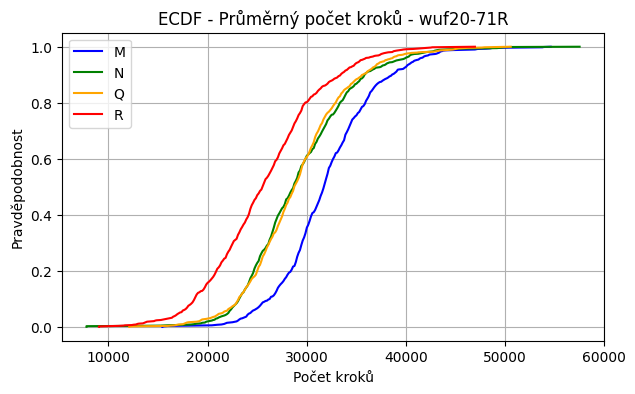

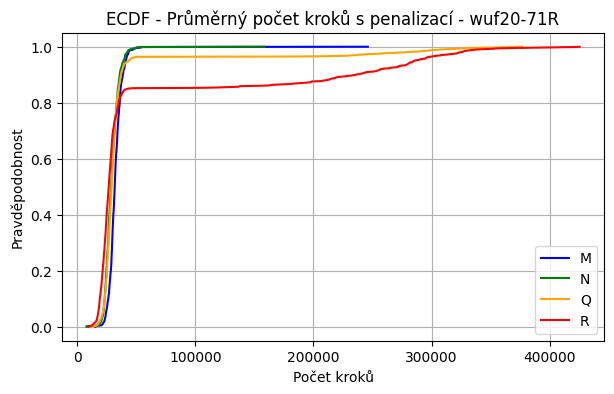

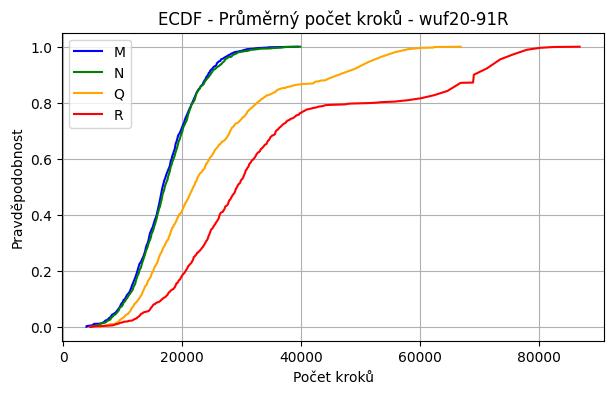

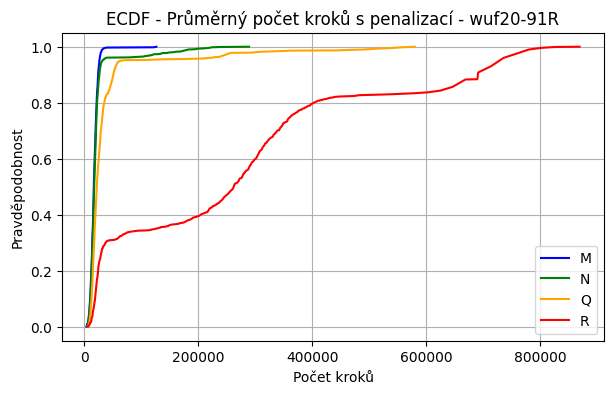

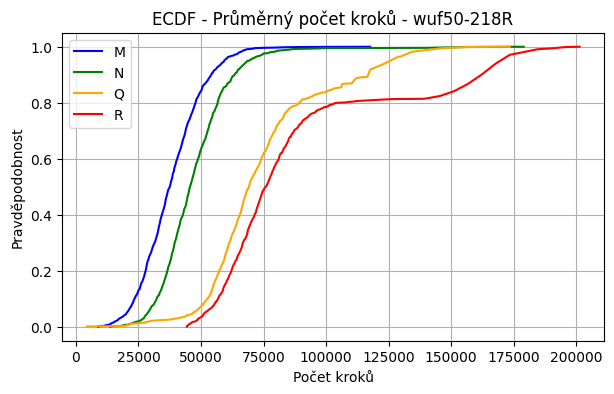

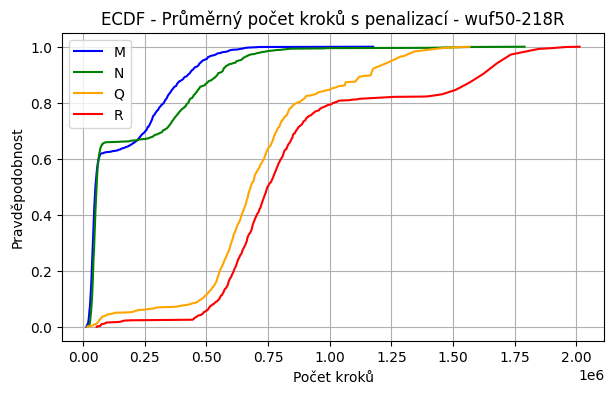

In [623]:
plot_ecdf_init()
plot_ecdf(dataA1['steps'],"M", 'blue')
plot_ecdf(dataA2['steps'],"N", 'green')
plot_ecdf(dataA3['steps'],"Q",'orange')
plot_ecdf(dataA4['steps'],"R",'red')
plot_ecdf_end('Počet kroků', 'ECDF - Průměrný počet kroků - wuf20-71R', 'ecdfA1')

plot_ecdf_init()
plot_ecdf(dataA1['awgFined'],"M", 'blue')
plot_ecdf(dataA2['awgFined'],"N", 'green')
plot_ecdf(dataA3['awgFined'],"Q",'orange')
plot_ecdf(dataA4['awgFined'],"R",'red')
plot_ecdf_end('Počet kroků', 'ECDF - Průměrný počet kroků s penalizací - wuf20-71R', 'ecdfA2')


plot_ecdf_init()
plot_ecdf(dataB1['steps'],"M", 'blue')
plot_ecdf(dataB2['steps'],"N", 'green')
plot_ecdf(dataB3['steps'],"Q",'orange')
plot_ecdf(dataB4['steps'],"R",'red')
plot_ecdf_end('Počet kroků', 'ECDF - Průměrný počet kroků - wuf20-91R', 'ecdfB1')

plot_ecdf_init()
plot_ecdf(dataB1['awgFined'],"M", 'blue')
plot_ecdf(dataB2['awgFined'],"N", 'green')
plot_ecdf(dataB3['awgFined'],"Q",'orange')
plot_ecdf(dataB4['awgFined'],"R",'red')
plot_ecdf_end('Počet kroků', 'ECDF - Průměrný počet kroků s penalizací - wuf20-91R', 'ecdfB2')


plot_ecdf_init()
plot_ecdf(dataC1['steps'],"M", 'blue')
plot_ecdf(dataC2['steps'],"N", 'green')
plot_ecdf(dataC3['steps'],"Q",'orange')
plot_ecdf(dataC4['steps'],"R",'red')
plot_ecdf_end('Počet kroků', 'ECDF - Průměrný počet kroků - wuf50-218R', 'ecdfC1')

plot_ecdf_init()
plot_ecdf(dataC1['awgFined'],"M", 'blue')
plot_ecdf(dataC2['awgFined'],"N", 'green')
plot_ecdf(dataC3['awgFined'],"Q",'orange')
plot_ecdf(dataC4['awgFined'],"R",'red')
plot_ecdf_end('Počet kroků', 'ECDF - Průměrný počet kroků s penalizací - wuf50-218R', 'ecdfC2')

<Figure size 700x400 with 0 Axes>

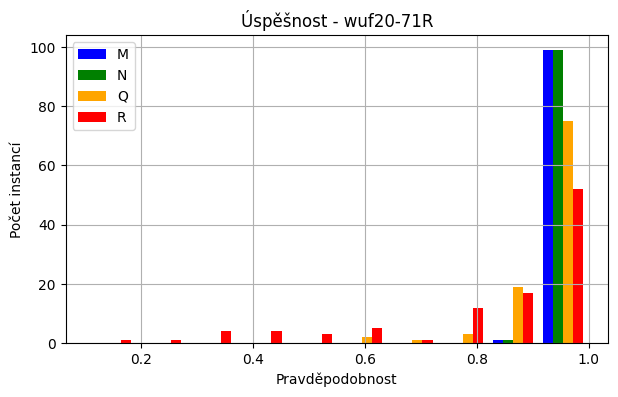

<Figure size 700x400 with 0 Axes>

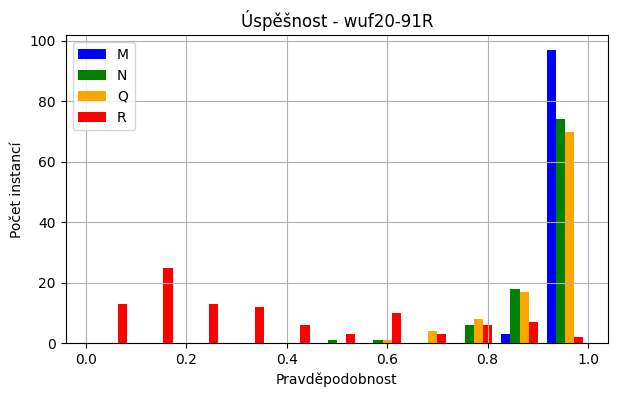

<Figure size 700x400 with 0 Axes>

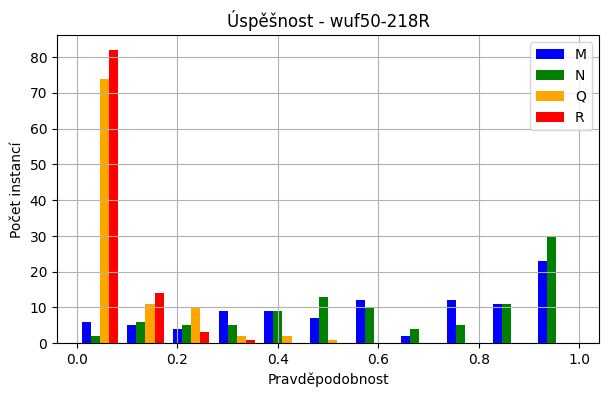

In [622]:
def getSuccessMean(data):
    return data.groupby('name')['successWeight'].mean()


dataSet = [
    getSuccessMean(dataA1),
    getSuccessMean(dataA2),
    getSuccessMean(dataA3),
    getSuccessMean(dataA4),
]


plot_hist_init()
plot_hist(dataSet, 'Úspěšnost - wuf20-71R', ['M', 'N', 'Q', 'R'],['blue', 'green', 'orange', 'red'])
plot_hist_end('histA')


dataSet = [
    getSuccessMean(dataB1),
    getSuccessMean(dataB2),
    getSuccessMean(dataB3),
    getSuccessMean(dataB4),
]


plot_hist_init()
plot_hist(dataSet, 'Úspěšnost - wuf20-91R', ['M', 'N', 'Q', 'R'],['blue', 'green', 'orange', 'red'])
plot_hist_end('histB')


dataSet = [
    getSuccessMean(dataC1),
    getSuccessMean(dataC2),
    getSuccessMean(dataC3),
    getSuccessMean(dataC4),
]


plot_hist_init()
plot_hist(dataSet, 'Úspěšnost - wuf50-218R', ['M', 'N', 'Q', 'R'],['blue', 'green', 'orange', 'red'])
plot_hist_end('histC')


<Figure size 700x400 with 0 Axes>

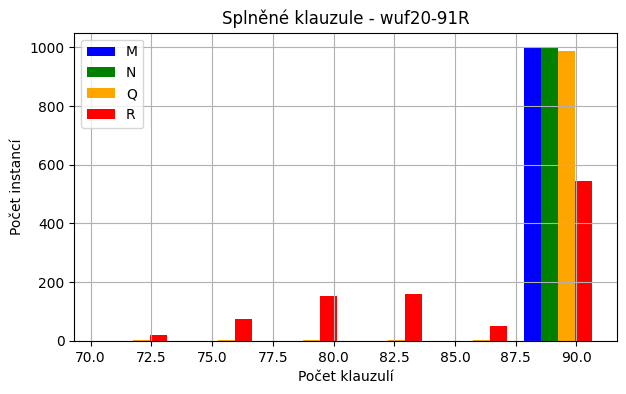

<Figure size 700x400 with 0 Axes>

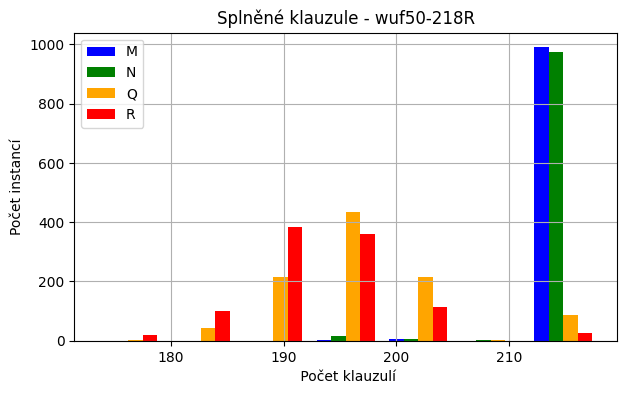

In [621]:

dataSet = [
    dataB1['clauseSat'],
    dataB2['clauseSat'],
    dataB3['clauseSat'],
    dataB4['clauseSat'],
]


plot_hist_init()

plot_hist(dataSet, 'Splněné klauzule - wuf20-91R', ['M', 'N', 'Q', 'R'],['blue', 'green', 'orange', 'red'],3)
plot_hist_end('histSatB', 'Počet klauzulí')



dataSet = [
    dataC1['clauseSat'],
    dataC2['clauseSat'],
    dataC3['clauseSat'],
    dataC4['clauseSat'],
]


plot_hist_init()

plot_hist(dataSet, 'Splněné klauzule - wuf50-218R', ['M', 'N', 'Q', 'R'],['blue', 'green', 'orange', 'red'],5)
plot_hist_end('histSatC',' Počet klauzulí')
